In [ ]:
from fbprophet import Prophet

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
gaz = pd.read_csv('UnitedKingdom.csv' , index_col=['Date'], dayfirst=True)
gaz.head(3)

,Gas consumption,UGS storage,LNG send out
Date,,,
2014-01-01,NaN,0.178547,612.923160
2014-01-02,NaN,0.188001,609.684587
2014-01-03,NaN,0.193733,606.439351


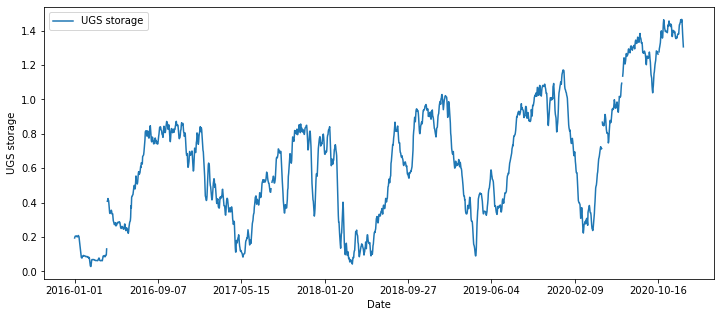

In [ ]:
a.plot(figsize=(12,5))
plt.ylabel('UGS storage')
plt.show()

In [ ]:
a = gaz.loc['2016-01-01':'2020-12-31','UGS storage':'UGS storage']

vibros = a["UGS storage"].diff()

vibros.loc[(np.abs(vibros)>0.1)] = np.nan
vibros = vibros.dropna()

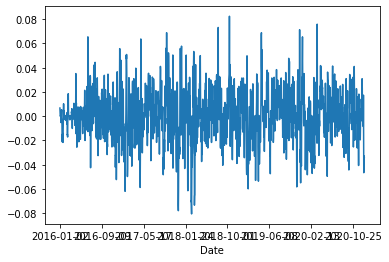

In [ ]:
vibros.plot()

In [ ]:
aa = pd.DataFrame({'ds': vibros.index, 'y': vibros.values})

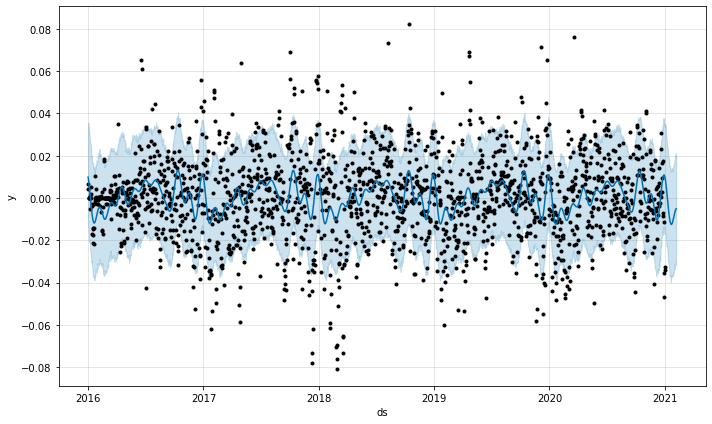

In [ ]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False)
model.fit(aa)

future = model.make_future_dataframe(periods=36)
forecast = model.predict(future)

model.plot(forecast)
plt.show()